### How has spending on specific ASU job descriptions changed over time?

In [151]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns

# read each CSV file into dataframe
FY2012 = pd.read_csv("Data/ASU Employee Salary Data 2012-2017 - The State Press - 2012.csv") 
FY2013 = pd.read_csv("Data/ASU Employee Salary Data 2012-2017 - The State Press - 2013.csv") 
FY2014 = pd.read_csv("Data/ASU Employee Salary Data 2012-2017 - The State Press - 2014.csv") 
FY2015 = pd.read_csv("Data/ASU Employee Salary Data 2012-2017 - The State Press - 2015.csv") 
FY2016 = pd.read_csv("Data/ASU Employee Salary Data 2012-2017 - The State Press - 2016.csv") 
FY2017 = pd.read_csv("Data/ASU Employee Salary Data 2012-2017 - The State Press - 2017.csv") 
FY2018 = pd.read_csv("Data/ASU Employee Salary Data 2012-2017 - The State Press - 2018.csv") 

# simple way of combining the CSV file dataframes into one
# similar to Union operator in SQL
asu_dept_data_long = pd.concat([FY2012,\
                           FY2013,\
                           FY2014,\
                           FY2015,\
                           FY2016,\
                           FY2017,\
                           FY2018])

asu_dept_data_long.drop('Unnamed: 6', axis=1, inplace=True)

# remove characters that prevent numbers from being converted to type int
asu_dept_data_long['Salary'] = asu_dept_data_long['Salary'].str.replace('$','')
asu_dept_data_long['Salary'] = asu_dept_data_long['Salary'].str.replace(',','')

asu_dept_data_long['Salary'] = asu_dept_data_long['Salary'].apply(lambda x: int(float(x)))

In [106]:
asu_dept_data_long.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71453 entries, 0 to 11773
Data columns (total 6 columns):
Calendar Year             71453 non-null int64
Full Name                 71453 non-null object
Job Description           71453 non-null object
Department Description    71453 non-null object
Salary                    71453 non-null int64
FTE                       71453 non-null float64
dtypes: float64(1), int64(2), object(3)
memory usage: 3.8+ MB


In [102]:
#remove unnecessary column on the right stating where the data came from
asu_dept_data_long.head()

,Calendar Year,Full Name,Job Description,Department Description,Salary,FTE
0,2012,"Aarestad,Barbara",Coordinator,Career Preparation,41000,1.0
1,2012,"Abbas,James",Assoc Professor,Sch Biological & Hlth Sys Engr,96936,1.0
2,2012,"Abbaszadegan,Morteza",Professor,Sch Sustain Engr & Built Envrn,125413,1.0
3,2012,"Abbe,Scott",Tech Support Analyst Coord,Engineering Technical Services,78838,1.0
4,2012,"Abbey,Craig",Director,EVPP Consultant Group,52000,0.5


In [104]:
#verify all years are included
asu_dept_data_long.groupby('Calendar Year')['Calendar Year'].count()

Calendar Year
2012     8778
2013     9172
2014     9677
2015    10321
2016    10709
2017    11022
2018    11774
Name: Calendar Year, dtype: int64

### All positions graphed cumulatively over time

Text(0, 0.5, 'Spending (Millions)')

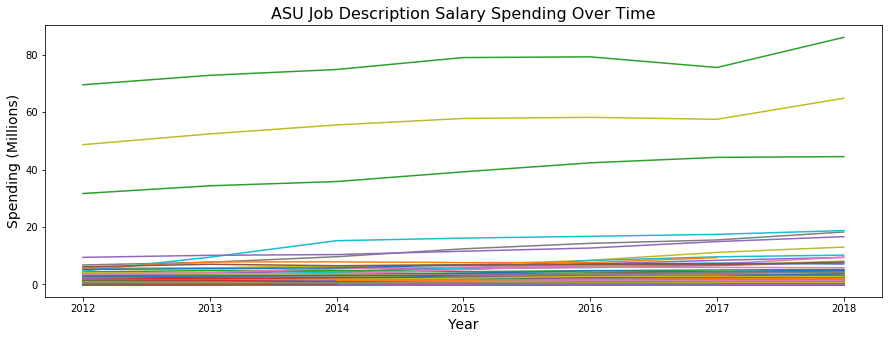

In [122]:
asu_job_group = asu_dept_data_long.groupby(['Calendar Year', 'Job Description'])['Salary'].sum().unstack()
asu_job_group = asu_job_group/1000000

fig, ax = plt.subplots(figsize=(15,5))
asu_job_group.plot(ax=ax)
ax.get_legend().remove()

plt.title("ASU Job Description Salary Spending Over Time",fontsize=16)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Spending (Millions)",fontsize=14)

### But what if I want to focus on just the top 5 positions by spending?

In [139]:
top_jobs = asu_dept_data_long.groupby(['Job Description'])['Salary'] \
    .sum() \
    .sort_values(ascending=False) \
    .to_frame() \
    .head(5)

top_jobs

,Salary
Job Description,
Professor,536715186
Assoc Professor,394755003
Asst Professor,272045629
Instructor,98447120
Lecturer,85796192


In [162]:
top_jobs_subset = pd.merge(top_jobs.index.to_frame(), asu_dept_data_long, on='Job Description')
top_jobs_subset.shape

(15454, 6)

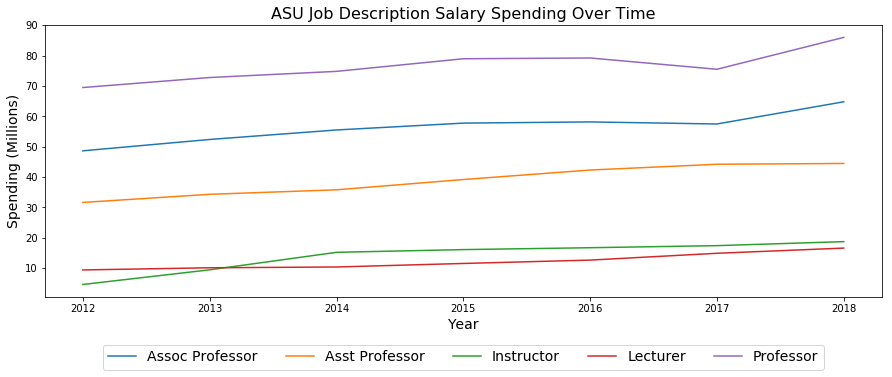

In [160]:
asu_job_group = top_jobs_subset.groupby(['Calendar Year', 'Job Description'])['Salary'].sum().unstack()
asu_job_group = asu_job_group/1000000

fig, ax = plt.subplots(figsize=(15,5))
asu_job_group.plot(ax=ax)

plt.title("ASU Job Description Salary Spending Over Time",fontsize=16)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Spending (Millions)",fontsize=14)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=5,fontsize=14)

# great resource for how to adjust the legend outside of the chart
# https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

### How do the mean salaries for the top 5 job descriptions by total spend compare?

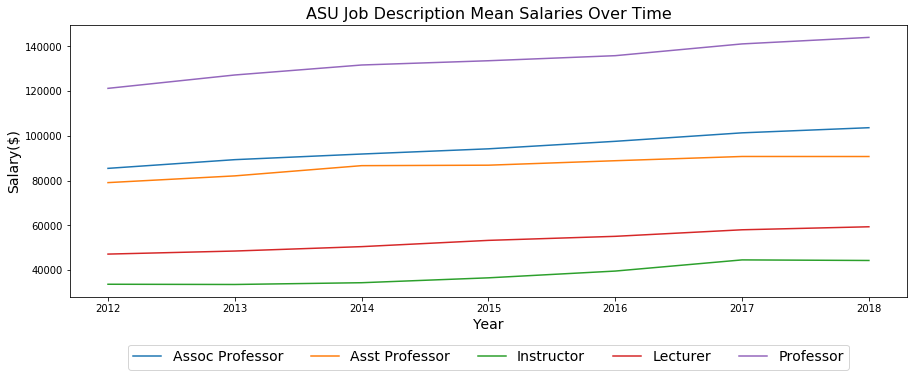

In [167]:
asu_job_group = top_jobs_subset.groupby(['Calendar Year', 'Job Description'])['Salary'].mean().unstack()

fig, ax = plt.subplots(figsize=(15,5))
asu_job_group.plot(ax=ax)

plt.title("ASU Job Description Mean Salaries Over Time",fontsize=16)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Salary($)",fontsize=14)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=5,fontsize=14)

### How do mean salaries compare between the top 10 departments by total department spending?

In [220]:
# using FY2018 to do this sort since some very large departments, such as College of Law
# did not exist by that name prior to 2016

asu_dept_data_long[asu_dept_data_long['Calendar Year'] == 2018] \
    .groupby(['Department Description'])['Salary'] \
    .sum() \
    .sort_values(ascending=False) \
    .to_frame() \
    .head(10)

,Salary
Department Description,
SDA Administration,24161342
School Of Earth & Space Explor,14613502
Sch Elect Comptr & Energy Engr,13889721
College Of Law,13420647
Sols Administration & Faculty,13289545
Sch Compt Infor & Dec Sys Engr,12931041
Sch Engr Matter Trnsprt Energy,12367782
School of Math & Stat Sciences,12117396
English,12056392


In [213]:
mean_jobs_top_departments = pd.merge(asu_dept_data_long[asu_dept_data_long['Calendar Year'] == 2018] \
                                     .groupby(['Department Description'])['Salary'] \
                                     .sum().sort_values(ascending=False) \
                                     .to_frame() \
                                     .head(10), \
                                     asu_dept_data_long, on='Department Description')
mean_jobs_top_departments.head()

,Department Description,Salary_x,Calendar Year,Full Name,Job Description,Salary_y,FTE
0,SDA Administration,24161342,2012,"Adams,Jill",Administrative Assoc,37749,1.00
1,SDA Administration,24161342,2012,"Alexander,DelVaughn",Asst Coach Football,175000,1.00
2,SDA Administration,24161342,2012,"Anderson,John",Asst Athletic Trainer,50000,1.00
3,SDA Administration,24161342,2012,"Arenson,Bridget",Assoc Director Sun Angel Event,34070,0.75
4,SDA Administration,24161342,2012,"Ball,Chris",Asst Coach Football,220000,1.00


In [215]:
mean_jobs_top_departments.groupby(['Calendar Year', 'Department Description'])['Salary_y'].mean().unstack()

Department Description,College Of Law,English,SDA Administration,Sch Compt Infor & Dec Sys Engr,Sch Elect Comptr & Energy Engr,Sch Engr Matter Trnsprt Energy,School Of Earth & Space Explor,School of Math & Stat Sciences,School of Molecular Sciences,Sols Administration & Faculty
Calendar Year,,,,,,,,,,
2012,NaN,57563.248366,94309.771605,84313.979381,84951.278261,70800.694915,74709.903509,73999.728070,NaN,67364.255682
2013,NaN,60362.893082,98546.927711,85039.914286,88881.025862,76195.278261,77683.130769,73593.293651,NaN,72270.745562
2014,NaN,60532.183908,113037.988372,84782.675214,89660.504348,79319.426357,79560.428571,76873.723577,NaN,73622.122093
2015,NaN,61900.295455,111580.100000,86000.905983,89630.250000,76408.896296,80749.471014,75905.529851,69895.064516,74767.933735
2016,90664.204225,64566.612717,110342.113636,88257.452991,89357.978417,79142.971631,82462.241611,77728.905109,75341.539062,75658.018868
2017,90808.564286,67975.084337,106271.648402,88125.416667,89856.340426,81158.577778,81594.822368,78941.478571,74475.837607,80884.859060
2018,92556.186207,71339.597633,104594.554113,86785.510067,89036.673077,83005.248322,82098.325843,81874.297297,74776.007353,81033.810976


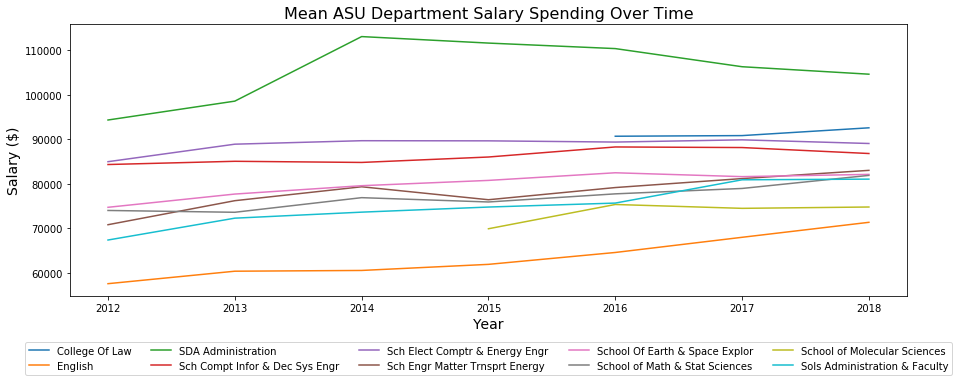

In [221]:
fig, ax = plt.subplots(figsize=(15,5))
mean_jobs_top_departments.groupby(['Calendar Year', 'Department Description'])['Salary_y'].mean().unstack().plot(ax=ax)

plt.title("Mean ASU Department Salary Spending Over Time",fontsize=16)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Salary ($)",fontsize=14)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, fontsize=10)

ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(10000))